In [1]:
import nfl_data_py as nfl
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text
from matplotlib.patches import Rectangle
import numpy as np

from functions import win_loss, get_team_schedule, fantasy_defense_rankings, calculate_top_player_matchup, plot_fantasy_vs_matchup

In [2]:
week_by_week2024 = nfl.import_weekly_data([2024], downcast=True)
play_by_play2024 = nfl.import_pbp_data([2024], downcast=True, cache=False, alt_path=None)
schedule2024 = nfl.import_schedules([2024])
seasonal2024 = nfl.import_seasonal_data([2024], "REG")
winstotal2024 = nfl.import_win_totals([2024])

Downcasting floats.
2024 done.
Downcasting floats.


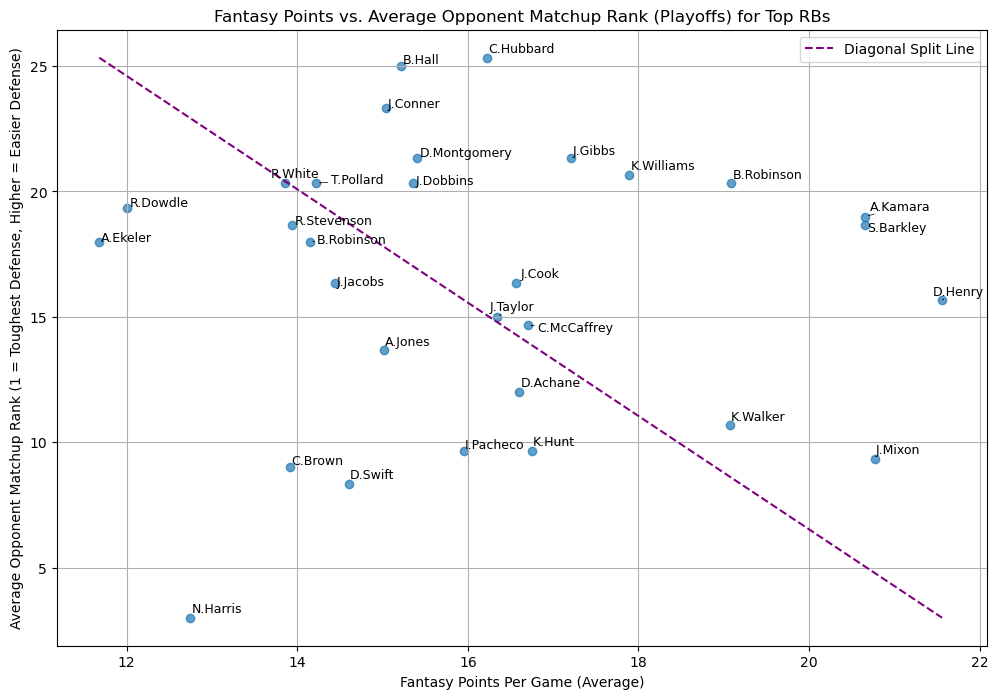

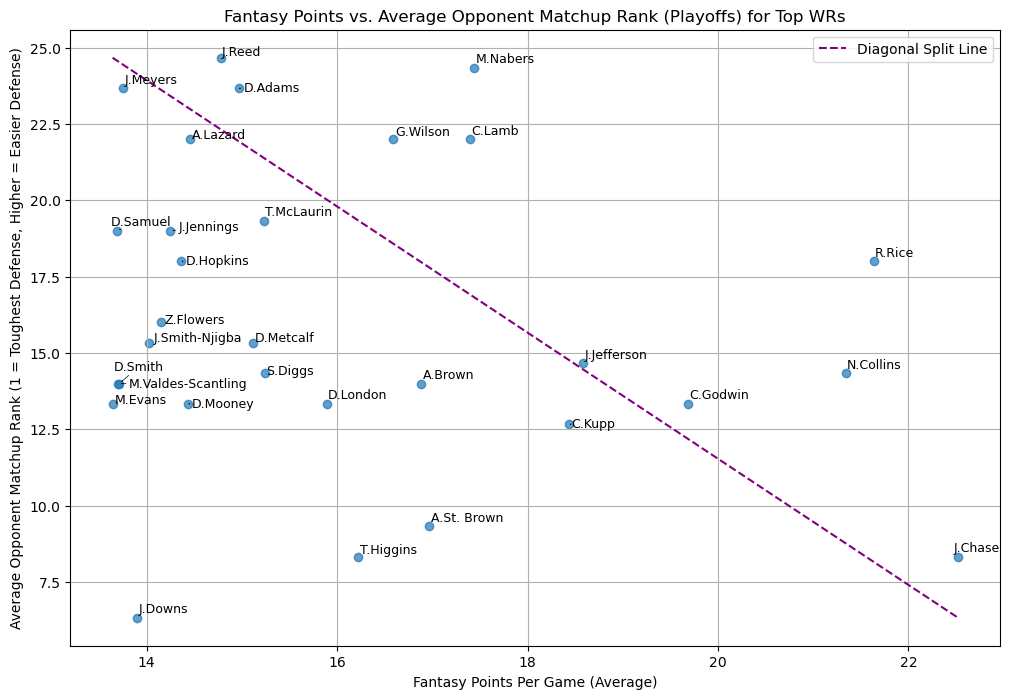

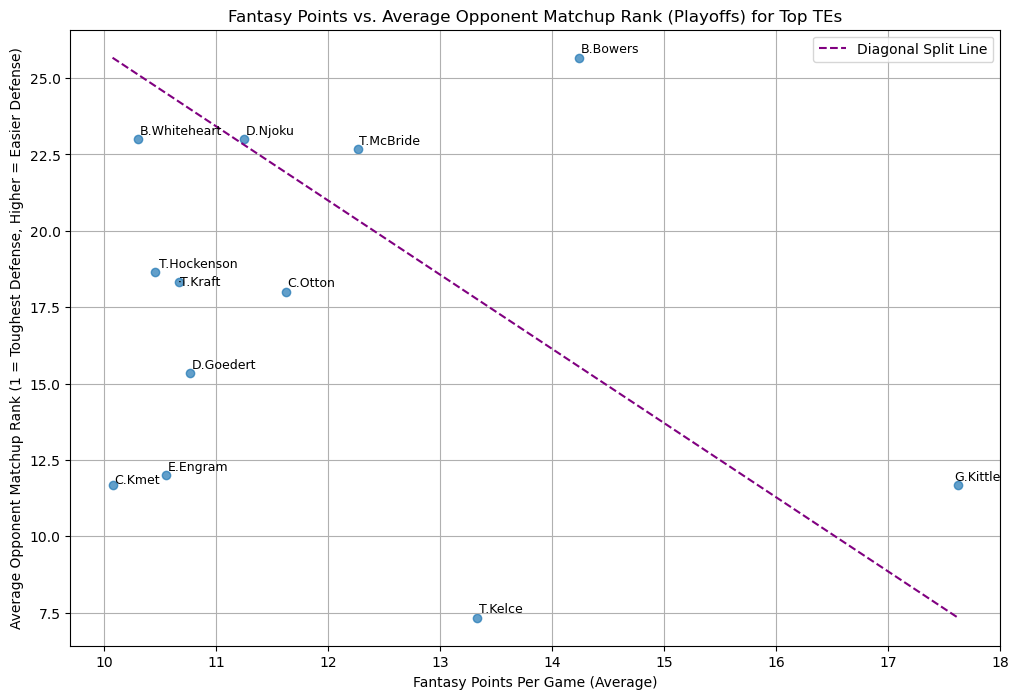

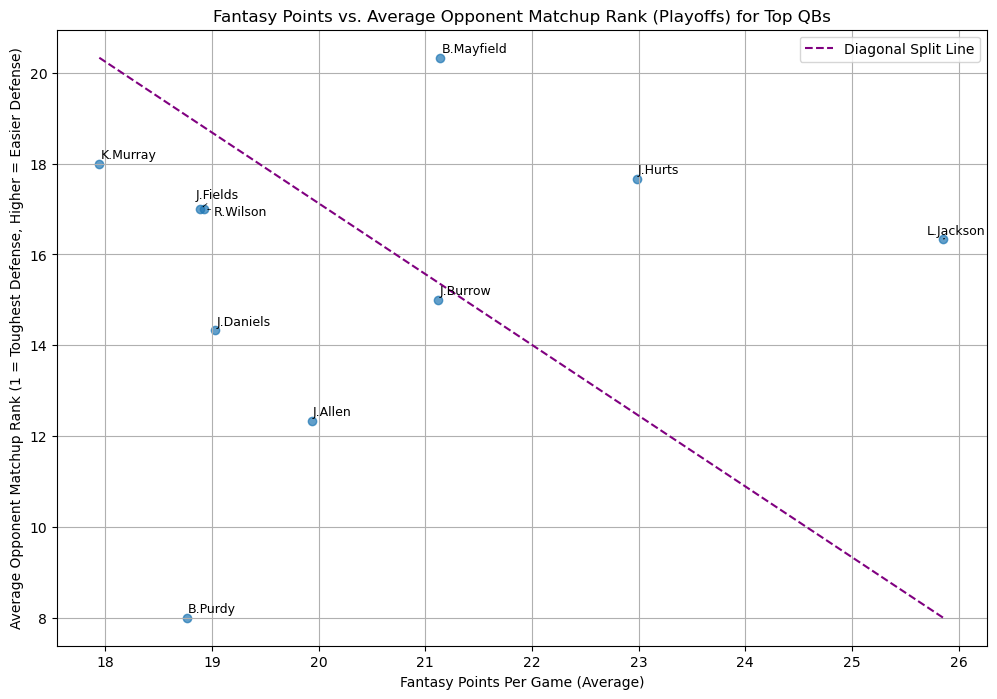

In [3]:
top10_qb, top30_rb, top30_wr, top12_te = calculate_top_player_matchup(schedule2024, week_by_week2024, 15, 17)

plot_fantasy_vs_matchup(top30_rb, "RB", filepath = "fantasy_vs_matchup_rb_2024POFF.png")
plot_fantasy_vs_matchup(top30_wr, "WR", filepath = "fantasy_vs_matchup_wr_2024POFF.png")
plot_fantasy_vs_matchup(top12_te, "TE", filepath = "fantasy_vs_matchup_te_2024POFF.png")
plot_fantasy_vs_matchup(top10_qb, "QB", filepath = "fantasy_vs_matchup_qb_2024POFF.png")
